Clone for IDM-VTON Model

In [ ]:
%cd /content
!git clone -b dev https://github.com/camenduru/IDM-VTON-hf
%cd /content/IDM-VTON-hf

!apt -y install -qq aria2
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/IDM-VTON/resolve/main/densepose/model_final_162be9.pkl -d /content/IDM-VTON-hf/ckpt/densepose -o model_final_162be9.pkl
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/IDM-VTON/resolve/main/humanparsing/parsing_atr.onnx -d /content/IDM-VTON-hf/ckpt/humanparsing -o parsing_atr.onnx
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/IDM-VTON/resolve/main/humanparsing/parsing_lip.onnx -d /content/IDM-VTON-hf/ckpt/humanparsing -o parsing_lip.onnx
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/IDM-VTON/resolve/main/openpose/ckpts/body_pose_model.pth -d /content/IDM-VTON-hf/ckpt/openpose/ckpts -o body_pose_model.pth

!pip install -q diffusers==0.25.0 accelerate==0.26.1 einops==0.7.0 onnxruntime==1.16.2 cloudpickle omegaconf gradio==4.24.0 fvcore av config



/content
Cloning into 'IDM-VTON-hf'...
remote: Enumerating objects: 1702, done.
remote: Counting objects: 100% (1702/1702), done.
remote: Compressing objects: 100% (1311/1311), done.
remote: Total 1702 (delta 392), reused 1690 (delta 385), pack-reused 0 (from 0)
Receiving objects: 100% (1702/1702), 6.72 MiB | 11.73 MiB/s, done.
Resolving deltas: 100% (392/392), done.
Error downloading object: ckpt/densepose/model_final_162be9.pkl (b8a7382): Smudge error: Error downloading ckpt/densepose/model_final_162be9.pkl (b8a7382001b16e453bad95ca9dbc68ae8f2b839b304cf90eaf5c27fbdb4dae91): [b8a7382001b16e453bad95ca9dbc68ae8f2b839b304cf90eaf5c27fbdb4dae91] Object does not exist on the server: [404] Object does not exist on the server

Errors logged to /content/IDM-VTON-hf/.git/lfs/logs/20241108T123326.640594801.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: ckpt/densepose/model_final_162be9.pkl: smudge filter lfs failed
You can inspect what 

Clone and Downloaded the VTON Dataset

In [ ]:
#  Clone the VITON-HD Repository
%cd /content
!git clone https://github.com/shadow2496/VITON-HD.git
%cd VITON-HD

#  Install Dependencies
!pip install opencv-python torchgeometry

#  Download the VITON-HD dataset from DropBox
!wget https://www.dropbox.com/s/10bfat0kg4si1bu/zalando-hd-resized.zip?dl=0 -O zalando-hd-resized.zip

#  Unzip the dataset
import zipfile
import os

zip_file = '/content/VITON-HD/zalando-hd-resized.zip'
dataset_dir = '/content/VITON-HD/datasets'

# Create directory if it doesn't exist
os.makedirs(dataset_dir, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

# Verify the dataset
print("Contents of the VITON-HD dataset directory:", os.listdir(dataset_dir))


/content
Cloning into 'VITON-HD'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 46 (delta 8), reused 7 (delta 6), pack-reused 31 (from 1)
Receiving objects: 100% (46/46), 5.03 MiB | 11.57 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/VITON-HD
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 1.4 MB/s eta 0:00:00
--2024-11-08 12:36:03--  https://www.dropbox.com/s/10bfat0kg4si1bu/zalando-hd-resized.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/xu08cx3fxmiwpg32yotd7/zalando-hd-resized.zip?rlkey=ks83mdv2pvmrdl2oo2bmmn69w&dl=0 [following]
--2024-11-08 12:36:03--  https://www.dropbox.com/scl/fi/xu08cx3fxmiwpg32yotd7/zalando-hd-resized.zip?rlkey=ks83mdv2

Contents of Dataset Directory

In [ ]:
import os

# Check the contents of the dataset directory to confirm paths
dataset_dir = '/content/VITON-HD/datasets'
print("Dataset directory contents:", os.listdir(dataset_dir))

# Check if the images folder exists
images_dir = os.path.join(dataset_dir, 'images')
if os.path.exists(images_dir):
    print("Images directory contents:", os.listdir(images_dir))
else:
    print("Images directory not found.")


Dataset directory contents: ['train', 'train_pairs.txt', 'test_pairs.txt', '.gitignore', 'test']
Images directory not found.


Accessing the Path of image

In [ ]:


import os

dataset_dir = '/content/VITON-HD/datasets'
image_paths = []

for root, dirs, files in os.walk(dataset_dir):
  for file in files:
    if file.endswith(('.jpg', '.png')):  # Adjust file extensions if needed
      image_paths.append(os.path.join(root, file))

print("Image paths:", image_paths)

Image paths: ['/content/VITON-HD/datasets/train/image/11195_00.jpg', '/content/VITON-HD/datasets/train/image/05082_00.jpg', '/content/VITON-HD/datasets/train/image/04895_00.jpg', '/content/VITON-HD/datasets/train/image/05127_00.jpg', '/content/VITON-HD/datasets/train/image/02335_00.jpg', '/content/VITON-HD/datasets/train/image/13771_00.jpg', '/content/VITON-HD/datasets/train/image/04670_00.jpg', '/content/VITON-HD/datasets/train/image/07471_00.jpg', '/content/VITON-HD/datasets/train/image/07040_00.jpg', '/content/VITON-HD/datasets/train/image/08777_00.jpg', '/content/VITON-HD/datasets/train/image/06751_00.jpg', '/content/VITON-HD/datasets/train/image/10763_00.jpg', '/content/VITON-HD/datasets/train/image/10268_00.jpg', '/content/VITON-HD/datasets/train/image/08876_00.jpg', '/content/VITON-HD/datasets/train/image/10506_00.jpg', '/content/VITON-HD/datasets/train/image/03394_00.jpg', '/content/VITON-HD/datasets/train/image/12586_00.jpg', '/content/VITON-HD/datasets/train/image/06565_00.jp

Displaying the image from loaded dataset

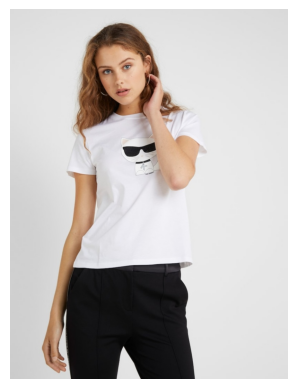

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
dataset_dir = '/content/VITON-HD/datasets'
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

#  Choose an image from the training set
image_path = os.path.join(train_dir, 'image/05082_00.jpg')  # Replace with the actual image filename
# Load the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


Data Preprocessing

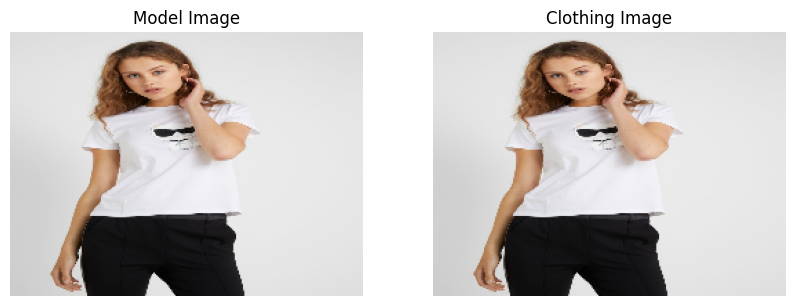

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#  Resize image to the expected input size
def preprocess_image(img_path, target_size=(256, 192)):
    img = cv2.imread(img_path)  # Read image using OpenCV
    img_resized = cv2.resize(img, target_size)  # Resize the image
    img_normalized = img_resized / 255.0  # Normalize to [0, 1]
    return img_normalized

# Path to your images
model_image_path = '/content/VITON-HD/datasets/train/image/05082_00.jpg'
clothing_image_path = '/content/VITON-HD/datasets/train/image/05082_00.jpg'

# Preprocess model image and clothing image
model_image = preprocess_image(model_image_path)
clothing_image = preprocess_image(clothing_image_path)

# Convert to a format suitable for visualization (optional)
model_image_display = np.uint8(model_image * 255)  # Convert back to [0,255] for display
clothing_image_display = np.uint8(clothing_image * 255)

# Plotting the images for visual inspection
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(model_image_display, cv2.COLOR_BGR2RGB))
plt.title("Model Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(clothing_image_display, cv2.COLOR_BGR2RGB))
plt.title("Clothing Image")
plt.axis('off')

plt.show()


In [ ]:
!pip install onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 52.3 MB/s eta 0:00:00


Importing the models

In [ ]:
import torch
import onnx

# Load the pose model (DensePose, Parsing, Pose Estimation)
body_pose_model = torch.load('/content/IDM-VTON-hf/ckpt/openpose/ckpts/body_pose_model.pth')
#densepose_model = torch.load('/content/IDM-VTON-hf/ckpt/densepose/model_final_162be9.pkl')
parsing_atr_model = onnx.load('/content/IDM-VTON-hf/ckpt/humanparsing/parsing_atr.onnx')
parsing_lip_model = onnx.load('/content/IDM-VTON-hf/ckpt/humanparsing/parsing_lip.onnx')


<ipython-input-56-2cdc2e6b9827>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  body_pose_model = torch.load('/content/IDM-VTON-hf/ckpt/openpose/ckpts/body_pose_model.pth')

In [ ]:
model_image = cv2.imread('/content/VITON-HD/datasets/train/image/05082_00.jpg')


Resizing the image

In [ ]:
from PIL import Image
import numpy as np

# Load the image using PIL
model_image_pil = Image.open('/content/VITON-HD/datasets/train/image/05082_00.jpg')
model_image = np.array(model_image_pil)

# Resize the image
model_image_resized = cv2.resize(model_image, (256, 192))  # Adjust the size as needed


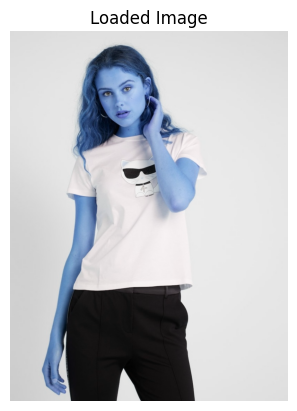

In [ ]:
import matplotlib.pyplot as plt

# Display the image
plt.imshow(cv2.cvtColor(model_image, cv2.COLOR_BGR2RGB))
plt.title("Loaded Image")
plt.axis('off')
plt.show()


Getting the list of directory

In [ ]:
%cd /content/IDM-VTON-hf
!ls -l ckpt


/content/IDM-VTON-hf
total 12
drwxr-xr-x 2 root root 4096 Nov  8 12:33 densepose
drwxr-xr-x 2 root root 4096 Nov  8 12:33 humanparsing
drwxr-xr-x 3 root root 4096 Nov  8 12:33 openpose


Executing of Model

In [ ]:
#  Install Required Libraries
!pip install opencv-python onnx onnxruntime

# Import the necessary libraries
import cv2
import numpy as np
import torch
import onnx
import onnxruntime as ort
import matplotlib.pyplot as plt

#  Load Pre-trained Models
# Load body pose model (OpenPose or similar)
pose_model_path = '/content/IDM-VTON-hf/ckpt/openpose/ckpts/body_pose_model.pth'
body_pose_model = torch.load(pose_model_path)



# Load Human Parsing Models (using ONNX)
parsing_atr_model_path = '/content/IDM-VTON-hf/ckpt/humanparsing/parsing_atr.onnx'
parsing_lip_model_path = '/content/IDM-VTON-hf/ckpt/humanparsing/parsing_lip.onnx'

parsing_atr_model = ort.InferenceSession(parsing_atr_model_path)
parsing_lip_model = ort.InferenceSession(parsing_lip_model_path)

#  Preprocess the Image (Resize and Normalize)
def preprocess_image(img_path, target_size=(256, 192)):
    img = cv2.imread(img_path)  # Read the image
    img_resized = cv2.resize(img, target_size)  # Resize the image to the target size
    img_normalized = img_resized / 255.0  # Normalize to [0, 1]
    return img_normalized

#  image paths
model_image_path = '/content/VITON-HD/datasets/train/image/05082_00.jpg'
clothing_image_path = '/content/VITON-HD/datasets/train/image/05082_00.jpg'

# Preprocess the model and clothing images
model_image = preprocess_image(model_image_path)
clothing_image = preprocess_image(clothing_image_path)

#  Run the Inference for Pose Estimation, DensePose, and Human Parsing
def run_inference(model_image):
    # Perform pose estimation
    # Assuming pose_model is a PyTorch model, perform inference
    pose_model.eval()  # Set to evaluation mode
    with torch.no_grad():
        pose_output = pose_model(torch.tensor(model_image).unsqueeze(0))  # Add batch dimension
    pose_result = pose_output[0].cpu().numpy()  # Convert to numpy for further processing

    # Perform DensePose Estimation (using onnxruntime model)
    input_image = np.expand_dims(model_image, axis=0).astype(np.float32)  # Add batch dimension
    densepose_result = densepose_model.run(None, {'input': input_image})  # Run the inference

    # Perform Human Parsing using ONNX models (parsing_atr_model and parsing_lip_model)
    parsing_atr_result = parsing_atr_model.run(None, {'input': input_image})
    parsing_lip_result = parsing_lip_model.run(None, {'input': input_image})

    return pose_result, densepose_result, parsing_atr_result, parsing_lip_result

pose_result, densepose_result, parsing_atr_result, parsing_lip_result = run_inference(model_image)

# Step 6: Virtual Try-On (Simplified)
def virtual_try_on(model_image, clothing_image, pose_result, densepose_result, parsing_atr_result):
    # A simplified approach to "transfer" clothing to model based on parsed regions
    try_on_result = model_image * (1 - parsing_atr_result[0]) + clothing_image * parsing_atr_result[0]  # Basic blending
    return try_on_result

try_on_result = virtual_try_on(model_image, clothing_image, pose_result, densepose_result, parsing_atr_result)

# Step 7: Visualize the Result
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(model_image, cv2.COLOR_BGR2RGB))
plt.title("Model Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(try_on_result, cv2.COLOR_BGR2RGB))
plt.title("Virtual Try-On Result")
plt.axis('off')

plt.show()




<ipython-input-78-c47bc5f37b11>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  body_pose_model = torch.load(pose_model_path)


AttributeError: 'dict' object has no attribute 'eval'

Clone the CatVTON model

In [ ]:
!git clone https://github.com/Zheng-Chong/CatVTON.git


Cloning into 'CatVTON'...
remote: Enumerating objects: 1315, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 1315 (delta 36), reused 52 (delta 29), pack-reused 1250 (from 1)
Receiving objects: 100% (1315/1315), 16.72 MiB | 20.31 MiB/s, done.
Resolving deltas: 100% (430/430), done.


In [ ]:
%cd CatVTON
!ls -l model

[Errno 2] No such file or directory: 'CatVTON'
/content/CatVTON
total 44
-rw-r--r-- 1 root root  3847 Nov  8 14:30 attn_processor.py
-rw-r--r-- 1 root root 11003 Nov  8 14:30 cloth_masker.py
drwxr-xr-x 2 root root  4096 Nov  8 14:30 DensePose
-rw-r--r-- 1 root root 16011 Nov  8 14:30 pipeline.py
drwxr-xr-x 4 root root  4096 Nov  8 14:30 SCHP
-rw-r--r-- 1 root root  3755 Nov  8 14:30 utils.py


In [ ]:
# Getting the file path

densepose_model_path = '/content/IDM-VTON-hf/ckpt/densepose/model_final_162be9.pkl'
print(f"DensePose model path: {densepose_model_path}")

DensePose model path: /content/IDM-VTON-hf/ckpt/densepose/model_final_162be9.pkl


In [ ]:
!pip install -r requirements.txt


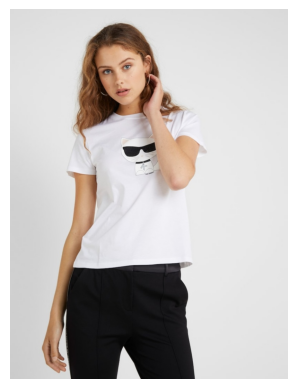

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
dataset_dir = '/content/VITON-HD/datasets'
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

#  Choose an image from the training set
image_path = os.path.join(train_dir, 'image/05082_00.jpg')  # Replace with the actual image filename
# Load the image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
import cv2
import numpy as np

# Example: Resize image to the expected input size
def preprocess_image(img_path, target_size=(256, 192)):
    img = cv2.imread(img_path)  # Read image using OpenCV
    img_resized = cv2.resize(model_image, (256, 192))  # Resize the image
    img_normalized = img_resized / 255.0  # Normalize to [0, 1]
    return img_normalized

# Example usage for model and clothing image
model_image_path = '/content/VITON-HD/datasets/train/image/05082_00.jpg'  # Path to your model image
clothing_image_path = '/content/VITON-HD/datasets/train/image/05082_01.jpg'  # Path to your clothing image

# Preprocess model image and clothing image
model_image = preprocess_image(model_image_path)
clothing_image = preprocess_image(clothing_image_path)


In [ ]:
import torch

# Define the path to the DensePose model
densepose_model_path = '/content/CatVTON/DensePose/densepose_model.pth'  # Change this if the file is different

# Load the DensePose model
densepose_model = torch.load(densepose_model_path)

# Set the model to evaluation mode
densepose_model.eval()

# If needed, move to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
densepose_model = densepose_model.to(device)

print("DensePose model loaded successfully!")
# Define the path to the SCHP model
schp_model_path = '/content/CatVTON/SCHP/schp_model.pth'  # Change this to the actual model file if different

# Load the SCHP model
schp_model = torch.load(schp_model_path)

# Set the model to evaluation mode
schp_model.eval()

# If needed, move to GPU
schp_model = schp_model.to(device)

print("SCHP model loaded successfully!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/CatVTON/DensePose/densepose_model.pth'